# The Best Neighborhood in Pittsburgh (For Squatting)

While deliberating on what we could be used to define the best neighborhood in Pittsburgh, we came to the conclusion that if we were ever to end up in a disadvantaged position and school did not work out for us, we should know where the best place for us to hide out would be. We wanted to know where we could go if we had no other options. With the data we had available to us we decided to analyze the Likelihood of Arrest for Trespassing, the Social Services available to us in a given neighborhood, and the Available Properties that could possibly be available for someone to squat in. Through weighing all these metrics would cross reference what would be the best neighborhood for access to food, shelter, and avoiding law enforcement. 

## Access to Social Services
While living without a reliable support network it's important to know what services are available to you that are provided by both government and charitable foundations. This data set archived all Social Services available throughout the City of Pittsburgh and Allegheny County. For this set we organized every available service by the neighborhood they were in and ranked them from highest to lowest. As this data set contained data from outside the city, after the data was sorted, we removed any instances from neighborhoods not in the city limits. 

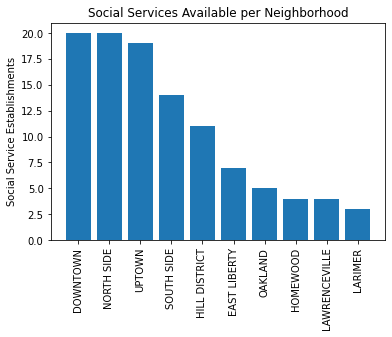

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

services = pd.read_csv("services.csv")

neighborhoodDictionary = {}

neighborhoods = pd.DataFrame(services, columns=['neighborhood'])

for i in range(len(neighborhoods)):
    if neighborhoods.loc[i, 'neighborhood'] != "Unknown":
        if neighborhoods.loc[i, 'neighborhood'].upper() not in neighborhoodDictionary:
            neighborhoodDictionary[neighborhoods.loc[i, 'neighborhood'].upper()] = 1
        else:
            neighborhoodDictionary[neighborhoods.loc[i, 'neighborhood'].upper()] += 1
neighborhoodDictionary.pop('WILKINSBURG')
neighborhoodDictionary.pop("MCKEESPORT")
neighborhoodDictionary.pop("MCKEES ROCKS")
neighborhoodDictionary.pop("BRADDOCK")
neighborhoodDictionary.pop("SWISSVALE")
neighborhoodDictionary.pop("NATRONA HEIGHTS")
neighborhoodsValues = pd.DataFrame(list(neighborhoodDictionary.items()), columns=['Neighborhoods', 'Values'])
final = neighborhoodsValues.sort_values(by=['Values'], ascending=False)
final.head(10) 

sortedNeighborhoodDictionary = dict(sorted(neighborhoodDictionary.items(), key=lambda x:x[1], reverse=True))
neighborhoodTopTen = {k: sortedNeighborhoodDictionary[k] for k in list(sortedNeighborhoodDictionary)[:10]}
#print(neighborhoodTopTen)
keys = neighborhoodTopTen.keys()
values = neighborhoodTopTen.values()
plt.bar(keys,values)
plt.xticks(rotation='vertical')

plt.title("Social Services Available per Neighborhood")
plt.ylabel("Social Service Establishments")

plt.show()

## Available Properties
This data set shows all publicly available properties in Pittsburgh that are owned by the City and up for sale. The thought behind using this data is that the city has taken ownership of these properties after foreclosures and evictions, so any property listed here is likely to be vacant. Therefore, if a neighborhood has a high amount of listings, it can make it easier for someone to move between properties and live in a good shelter while evading detection or causing issues for residents. For this data we did not take into account the total size of a given neighborhood as we decided what was more important was total availability and not strict density. 


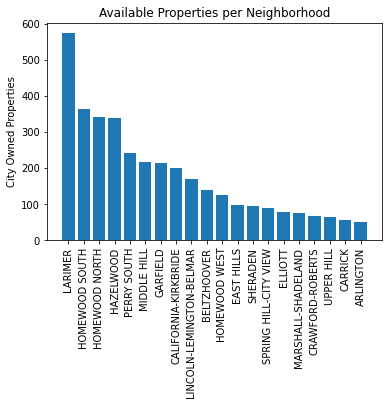

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

houses = pd.read_csv('public-properties.csv',sep = ',') 

neighborhoods = {}
for index, row in houses.iterrows():
    key = row['Neighborhood']
    
    if key in neighborhoods:
        neighborhoods[key] = int(neighborhoods[key] + 1)
    else:
        neighborhoods[key] = int(1)

def my_filtering_function(pair):
    key, value = pair
    return value >= 10
 
filtered_neighborhoods = dict(filter(my_filtering_function, neighborhoods.items()))
filtered_neighborhoods = dict(sorted(filtered_neighborhoods.items(), key=lambda x:x[1], reverse=True))
#print(filtered_neighborhoods)

filtered_neighborhoods_first20 = {k: filtered_neighborhoods[k] for k in list(filtered_neighborhoods)[:20]}
keys = filtered_neighborhoods_first20.keys()
values = filtered_neighborhoods_first20.values()
plt.bar(keys, values)
plt.xticks(rotation='vertical')

plt.title("Available Properties per Neighborhood")
plt.ylabel("City Owned Properties")

plt.show()

## Likelihood of Arrest
When evaluating the best neighborhood for squatting of course something to take into consideration is the likelihood of being arrested for trespassing. The data set used for this metric was the total arrests made by Pittsburgh police and their infraction type and location. To sort this data, we first tallied up all the arrests made in each neighborhood and then tallied up any arrests made for trespassing of any kind. With these two we then checked what percentage of the total arrests made in a neighborhood was for trespassing and ranked the neighborhoods from lowest to highest. The reason we wanted the percentage of arrests for trespassing was because we could conclude based on that how much local law enforcement were devoting their time to enforcing trespass laws. Essentially we could interpret if police were more occupied with other things to go after squatters. 

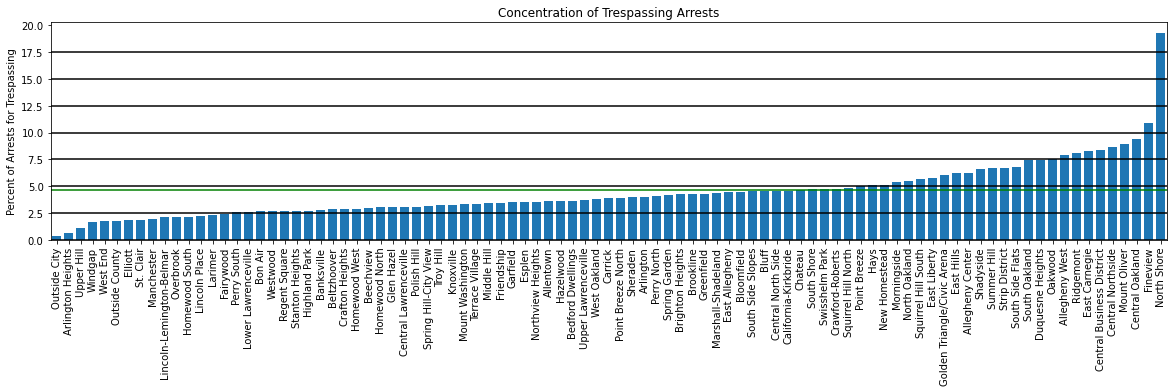

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("arrests.csv")

trespass_df = df[df['OFFENSES'].str.contains('TRESPASS', case=False, na=False)]
trespass_counts = trespass_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
trespass_counts.columns = ['INCIDENTNEIGHBORHOOD', 'TRESPASS_ARRESTS']
total_arrests = df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
total_arrests.columns = ['INCIDENTNEIGHBORHOOD', 'TOTAL_ARRESTS']

result_df = pd.merge(trespass_counts, total_arrests, on='INCIDENTNEIGHBORHOOD', how='left')

result_df['PERCENT_TRESPASS'] = (result_df['TRESPASS_ARRESTS'] / result_df['TOTAL_ARRESTS']) * 100
result_df.sort_values(by='PERCENT_TRESPASS', inplace=True)
#print(result_df)
arrests = (result_df['TRESPASS_ARRESTS'].sum() / result_df['TOTAL_ARRESTS'].sum())
#print("Average Percent Trespass: ", arrests*100)



plt.figure().set_figwidth(20)
plt.hlines([0, 2.5,5, 7.5, 10, 12.5, 15, 17.5], -0.5,92.5 )
plt.hlines([4.6989], -0.5,92.5, colors = 'g')
plt.xlim(-0.5,92.5        )
plt.bar(result_df['INCIDENTNEIGHBORHOOD'], result_df['PERCENT_TRESPASS'])
plt.xticks(rotation='vertical')

plt.title("Concentration of Trespassing Arrests")
plt.ylabel("Percent of Arrests for Trespassing")
plt.show()



## Conclusions
The neighborhood that showed up most consisitnetly and highly rated across all our metrics was Homewood South. 


**Charlie's Conclusion**

In my opinion the best neighborhood is Homewood South because I'm not from pittsburgh so I have no opinion on the neighborhoods and the data points to a logical conclusion. 

**Anthony's Conclusion**

I have lived in Pittsburgh for 9 years and my mother lives nearby to Homewood and while based on my experience of living nearby it is not the safest place to live it is likely to be easier to live as a squatter in the area. While I was surprised our data showed this after devoting some thought to it, it does make sense based on the factors we considered.  


**Joshua's Conclusion**

Based on my experiences living outside Pittsburgh Homewood would not be one of my first choices on places to like. However, when squatting you do not necessarily want to be in the best areas since that is where people are more likely to turn you in. As such South Homewood makes sense as a good place to squat based on both my knowledge and the data.   

<img src="neighborhoods.jpg">